In [1]:
import os

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
nyc = pd.read_csv(r"C:\\Users\priya\Documents\data science\Project\nyc_csr\nyc.csv",low_memory=False)

In [4]:
nyc.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [5]:
nyc.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [6]:
nyc.shape

(364558, 53)

In [7]:
nyc.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

In [8]:
nyc_missing=nyc.columns[nyc.isnull().any()]
nyc_missing

Index(['Closed Date', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Due Date',
       'Resolution Action Updated Date', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'School Region', 'School Code',
       'School Zip', 'School or Citywide Complaint', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Garage Lot Name', 'Ferry Direction', 'Ferry Terminal Name', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [9]:
percent_missing= nyc.isnull().sum()*100/len(nyc)
percent_missing

Unique Key                          0.000000
Created Date                        0.000000
Closed Date                         0.653120
Agency                              0.000000
Agency Name                         0.000000
Complaint Type                      0.000000
Descriptor                          1.783255
Location Type                       0.036483
Incident Zip                        0.822366
Incident Address                   14.181283
Street Name                        14.181283
Cross Street 1                     15.686941
Cross Street 2                     15.856187
Intersection Street 1              85.977540
Intersection Street 2              86.144317
Address Type                        0.892039
City                                0.822091
Landmark                           99.897136
Facility Type                       0.655314
Status                              0.000000
Due Date                            0.000823
Resolution Description              0.000000
Resolution

In [10]:
drop_missing= nyc.dropna(axis=1, thresh=int(0.5*len(nyc)))
drop_missing
drop_missing.isnull().sum()*100/len(drop_missing)

Unique Key                         0.000000
Created Date                       0.000000
Closed Date                        0.653120
Agency                             0.000000
Agency Name                        0.000000
Complaint Type                     0.000000
Descriptor                         1.783255
Location Type                      0.036483
Incident Zip                       0.822366
Incident Address                  14.181283
Street Name                       14.181283
Cross Street 1                    15.686941
Cross Street 2                    15.856187
Address Type                       0.892039
City                               0.822091
Facility Type                      0.655314
Status                             0.000000
Due Date                           0.000823
Resolution Description             0.000000
Resolution Action Updated Date     0.658880
Community Board                    0.000000
Borough                            0.000000
X Coordinate (State Plane)      

In [11]:
numeric_nyc = drop_missing.select_dtypes(include=[np.number])
categorical_nyc = drop_missing.select_dtypes(exclude=[np.number])

In [12]:
categorical_nyc.columns

Index(['Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Address',
       'Street Name', 'Cross Street 1', 'Cross Street 2', 'Address Type',
       'City', 'Facility Type', 'Status', 'Due Date', 'Resolution Description',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'Park Facility Name', 'Park Borough', 'School Name', 'School Number',
       'School Region', 'School Code', 'School Phone Number', 'School Address',
       'School City', 'School State', 'School Zip', 'School Not Found',
       'Location'],
      dtype='object')

In [13]:
numeric_nyc

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude
0,32310363,10034.0,1005409.0,254678.0,40.865682,-73.923501
1,32309934,11105.0,1007766.0,221986.0,40.775945,-73.915094
2,32309159,10458.0,1015081.0,256380.0,40.870325,-73.888525
3,32305098,10461.0,1031740.0,243899.0,40.835994,-73.828379
4,32306529,11373.0,1019123.0,206375.0,40.733060,-73.874170
...,...,...,...,...,...,...
364553,29609918,11421.0,1022809.0,192567.0,40.695145,-73.860949
364554,29608392,10468.0,1009923.0,255465.0,40.867830,-73.907178
364555,29607589,10031.0,997847.0,238629.0,40.821647,-73.950873
364556,29610889,10466.0,1024816.0,262237.0,40.886361,-73.853290


In [14]:
numeric_nyc

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude
0,32310363,10034.0,1005409.0,254678.0,40.865682,-73.923501
1,32309934,11105.0,1007766.0,221986.0,40.775945,-73.915094
2,32309159,10458.0,1015081.0,256380.0,40.870325,-73.888525
3,32305098,10461.0,1031740.0,243899.0,40.835994,-73.828379
4,32306529,11373.0,1019123.0,206375.0,40.733060,-73.874170
...,...,...,...,...,...,...
364553,29609918,11421.0,1022809.0,192567.0,40.695145,-73.860949
364554,29608392,10468.0,1009923.0,255465.0,40.867830,-73.907178
364555,29607589,10031.0,997847.0,238629.0,40.821647,-73.950873
364556,29610889,10466.0,1024816.0,262237.0,40.886361,-73.853290


In [15]:
numeric_nyc.isnull().sum()

Unique Key                       0
Incident Zip                  2998
X Coordinate (State Plane)    4030
Y Coordinate (State Plane)    4030
Latitude                      4030
Longitude                     4030
dtype: int64

In [16]:
numeric_nyc.columns = numeric_nyc.columns.str.replace (' ', '_')

In [17]:
numeric_nyc.columns

Index(['Unique_Key', 'Incident_Zip', 'X_Coordinate_(State_Plane)',
       'Y_Coordinate_(State_Plane)', 'Latitude', 'Longitude'],
      dtype='object')

In [18]:
import seaborn as sns

In [19]:
numeric_nyc.head()

,Unique_Key,Incident_Zip,X_Coordinate_(State_Plane),Y_Coordinate_(State_Plane),Latitude,Longitude
0,32310363,10034.0,1005409.0,254678.0,40.865682,-73.923501
1,32309934,11105.0,1007766.0,221986.0,40.775945,-73.915094
2,32309159,10458.0,1015081.0,256380.0,40.870325,-73.888525
3,32305098,10461.0,1031740.0,243899.0,40.835994,-73.828379
4,32306529,11373.0,1019123.0,206375.0,40.733060,-73.874170


In [20]:
numeric_nyc.mode()

,Unique_Key,Incident_Zip,X_Coordinate_(State_Plane),Y_Coordinate_(State_Plane),Latitude,Longitude
0,29607374,11385.0,1021327.0,241829.0,40.830362,-73.866022
1,29607377,NaN,NaN,NaN,NaN,NaN
2,29607433,NaN,NaN,NaN,NaN,NaN
3,29607567,NaN,NaN,NaN,NaN,NaN
4,29607589,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
364553,32310638,NaN,NaN,NaN,NaN,NaN
364554,32310639,NaN,NaN,NaN,NaN,NaN
364555,32310640,NaN,NaN,NaN,NaN,NaN
364556,32310644,NaN,NaN,NaN,NaN,NaN


In [21]:
numeric_nyc.fillna(numeric_nyc.mode(),inplace = True)
numeric_nyc

,Unique_Key,Incident_Zip,X_Coordinate_(State_Plane),Y_Coordinate_(State_Plane),Latitude,Longitude
0,32310363,10034.0,1005409.0,254678.0,40.865682,-73.923501
1,32309934,11105.0,1007766.0,221986.0,40.775945,-73.915094
2,32309159,10458.0,1015081.0,256380.0,40.870325,-73.888525
3,32305098,10461.0,1031740.0,243899.0,40.835994,-73.828379
4,32306529,11373.0,1019123.0,206375.0,40.733060,-73.874170
...,...,...,...,...,...,...
364553,29609918,11421.0,1022809.0,192567.0,40.695145,-73.860949
364554,29608392,10468.0,1009923.0,255465.0,40.867830,-73.907178
364555,29607589,10031.0,997847.0,238629.0,40.821647,-73.950873
364556,29610889,10466.0,1024816.0,262237.0,40.886361,-73.853290


In [22]:
categorical_nyc.isnull().sum()*100/len(categorical_nyc)

Created Date                       0.000000
Closed Date                        0.653120
Agency                             0.000000
Agency Name                        0.000000
Complaint Type                     0.000000
Descriptor                         1.783255
Location Type                      0.036483
Incident Address                  14.181283
Street Name                       14.181283
Cross Street 1                    15.686941
Cross Street 2                    15.856187
Address Type                       0.892039
City                               0.822091
Facility Type                      0.655314
Status                             0.000000
Due Date                           0.000823
Resolution Description             0.000000
Resolution Action Updated Date     0.658880
Community Board                    0.000000
Borough                            0.000000
Park Facility Name                 0.000000
Park Borough                       0.000000
School Name                     

In [23]:
categorical_nyc.columns = categorical_nyc.columns.str.replace (' ', '_')

In [24]:
categorical_nyc.columns

Index(['Created_Date', 'Closed_Date', 'Agency', 'Agency_Name',
       'Complaint_Type', 'Descriptor', 'Location_Type', 'Incident_Address',
       'Street_Name', 'Cross_Street_1', 'Cross_Street_2', 'Address_Type',
       'City', 'Facility_Type', 'Status', 'Due_Date', 'Resolution_Description',
       'Resolution_Action_Updated_Date', 'Community_Board', 'Borough',
       'Park_Facility_Name', 'Park_Borough', 'School_Name', 'School_Number',
       'School_Region', 'School_Code', 'School_Phone_Number', 'School_Address',
       'School_City', 'School_State', 'School_Zip', 'School_Not_Found',
       'Location'],
      dtype='object')

In [25]:
#categorical_nyc.fillna(categorical_nyc.mode)
categorical_nyc.Incident_Address.fillna(categorical_nyc.Incident_Address.mode()[0],inplace = True)

In [26]:
categorical_nyc.Street_Name.fillna(categorical_nyc.Street_Name.mode()[0],inplace = True)
categorical_nyc.Street_Name.head(5)

0    VERMILYEA AVENUE
1           23 AVENUE
2    VALENTINE AVENUE
3      BAISLEY AVENUE
4             57 ROAD
Name: Street_Name, dtype: object

In [27]:
categorical_nyc.fillna(categorical_nyc.mode())

,Created_Date,Closed_Date,Agency,Agency_Name,Complaint_Type,Descriptor,Location_Type,Incident_Address,Street_Name,Cross_Street_1,...,School_Number,School_Region,School_Code,School_Phone_Number,School_Address,School_City,School_State,School_Zip,School_Not_Found,Location
0,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,"(40.86568153633767, -73.92350095571744)"
1,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,27-07 23 AVENUE,23 AVENUE,27 STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,"(40.775945312321085, -73.91509393898605)"
2,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,"(40.870324522111424, -73.88852464418646)"
3,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,"(40.83599404683083, -73.82837939584206)"
4,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,87-14 57 ROAD,57 ROAD,SEABURY STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,"(40.733059618956815, -73.87416975810375)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364553,01/01/2015 12:04:44 AM,01/01/2015 10:22:31 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,84-25 85 ROAD,85 ROAD,FOREST PARKWAY,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,"(40.69514470265117, -73.86094888534394)"
364554,01/01/2015 12:04:28 AM,01/01/2015 02:25:02 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,2555 SEDGWICK AVENUE,SEDGWICK AVENUE,BAILEY AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,"(40.86782963689454, -73.90717786644662)"
364555,01/01/2015 12:01:30 AM,01/01/2015 12:20:33 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,508 WEST 139 STREET,WEST 139 STREET,AMSTERDAM AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,"(40.821646626438095, -73.95087342885292)"
364556,01/01/2015 12:01:29 AM,01/01/2015 02:42:22 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,931 EAST 226 STREET,EAST 226 STREET,BRONXWOOD AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,"(40.88636077906953, -73.85329048666742)"


In [28]:
categorical_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   Created_Date                    364558 non-null  object
 1   Closed_Date                     362177 non-null  object
 2   Agency                          364558 non-null  object
 3   Agency_Name                     364558 non-null  object
 4   Complaint_Type                  364558 non-null  object
 5   Descriptor                      358057 non-null  object
 6   Location_Type                   364425 non-null  object
 7   Incident_Address                364558 non-null  object
 8   Street_Name                     364558 non-null  object
 9   Cross_Street_1                  307370 non-null  object
 10  Cross_Street_2                  306753 non-null  object
 11  Address_Type                    361306 non-null  object
 12  City                          

In [29]:
categorical_nyc['Created_Date']   

0         12/31/2015 11:59:45 PM
1         12/31/2015 11:59:44 PM
2         12/31/2015 11:59:29 PM
3         12/31/2015 11:57:46 PM
4         12/31/2015 11:56:58 PM
                   ...          
364553    01/01/2015 12:04:44 AM
364554    01/01/2015 12:04:28 AM
364555    01/01/2015 12:01:30 AM
364556    01/01/2015 12:01:29 AM
364557    01/01/2015 12:00:50 AM
Name: Created_Date, Length: 364558, dtype: object

In [30]:
categorical_nyc[['Created_Date','Closed_Date','Due_Date']] = categorical_nyc[['Created_Date','Closed_Date','Due_Date']].apply(pd.to_datetime,errors ='coerce')

In [31]:
categorical_nyc[['Created_Date','Closed_Date','Due_Date']]

,Created_Date,Closed_Date,Due_Date
0,2015-12-31 23:59:45,2016-01-01 00:55:15,2016-01-01 07:59:45
1,2015-12-31 23:59:44,2016-01-01 01:26:57,2016-01-01 07:59:44
2,2015-12-31 23:59:29,2016-01-01 04:51:03,2016-01-01 07:59:29
3,2015-12-31 23:57:46,2016-01-01 07:43:13,2016-01-01 07:57:46
4,2015-12-31 23:56:58,2016-01-01 03:24:42,2016-01-01 07:56:58
...,...,...,...
364553,2015-01-01 00:04:44,2015-01-01 10:22:31,2015-01-01 08:04:44
364554,2015-01-01 00:04:28,2015-01-01 02:25:02,2015-01-01 08:04:28
364555,2015-01-01 00:01:30,2015-01-01 00:20:33,2015-01-01 08:01:30
364556,2015-01-01 00:01:29,2015-01-01 02:42:22,2015-01-01 08:01:29


In [32]:
categorical_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Created_Date                    364558 non-null  datetime64[ns]
 1   Closed_Date                     362177 non-null  datetime64[ns]
 2   Agency                          364558 non-null  object        
 3   Agency_Name                     364558 non-null  object        
 4   Complaint_Type                  364558 non-null  object        
 5   Descriptor                      358057 non-null  object        
 6   Location_Type                   364425 non-null  object        
 7   Incident_Address                364558 non-null  object        
 8   Street_Name                     364558 non-null  object        
 9   Cross_Street_1                  307370 non-null  object        
 10  Cross_Street_2                  306753 non-null  object 

In [33]:
categorical_nyc.Closed_Date.fillna(categorical_nyc.Closed_Date.mode()[0],inplace=True)

In [34]:
categorical_nyc.Descriptor.fillna(categorical_nyc.Descriptor.mode()[0],inplace=True)

In [35]:
categorical_nyc.Location_Type.fillna(categorical_nyc.Location_Type.mode()[0],inplace=True)

In [36]:
categorical_nyc.Cross_Street_1.fillna(categorical_nyc.Cross_Street_1 .mode()[0],inplace=True)

In [37]:
categorical_nyc.Cross_Street_2.fillna(categorical_nyc.Cross_Street_2 .mode()[0],inplace=True)

In [38]:
categorical_nyc.Address_Type.fillna(categorical_nyc.Address_Type .mode()[0],inplace=True)

In [39]:
categorical_nyc.City.fillna(categorical_nyc.City .mode()[0],inplace=True)

In [40]:
categorical_nyc.Facility_Type.fillna(categorical_nyc.Facility_Type .mode()[0],inplace=True)

In [41]:
categorical_nyc.Resolution_Action_Updated_Date.fillna(categorical_nyc.Resolution_Action_Updated_Date .mode()[0],inplace=True)

In [42]:
categorical_nyc.Due_Date.fillna(categorical_nyc.Due_Date.mode()[0],inplace=True)

In [43]:
categorical_nyc.School_Region.fillna(categorical_nyc.School_Region.mode()[0],inplace=True)

In [44]:
categorical_nyc.School_Code.fillna(categorical_nyc.School_Code .mode()[0],inplace=True)

In [45]:
categorical_nyc.School_Zip.fillna(categorical_nyc.School_Zip.mode()[0],inplace=True)

In [46]:
categorical_nyc.Location.fillna(categorical_nyc.Location.mode()[0],inplace=True)

In [47]:
numerical_nyc = drop_missing.select_dtypes(include=[np.number])
numerical_nyc.columns
numerical_nyc.columns=numerical_nyc.columns.str.replace(' ','_')
numerical_nyc.columns

Index(['Unique_Key', 'Incident_Zip', 'X_Coordinate_(State_Plane)',
       'Y_Coordinate_(State_Plane)', 'Latitude', 'Longitude'],
      dtype='object')

In [48]:
numerical_nyc.isnull().sum()*100/len(numerical_nyc)

Unique_Key                    0.000000
Incident_Zip                  0.822366
X_Coordinate_(State_Plane)    1.105448
Y_Coordinate_(State_Plane)    1.105448
Latitude                      1.105448
Longitude                     1.105448
dtype: float64

In [49]:
numerical_nyc.Incident_Zip.fillna(numerical_nyc.Incident_Zip.mode()[0],inplace=True)
numerical_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 6 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unique_Key                  364558 non-null  int64  
 1   Incident_Zip                364558 non-null  float64
 2   X_Coordinate_(State_Plane)  360528 non-null  float64
 3   Y_Coordinate_(State_Plane)  360528 non-null  float64
 4   Latitude                    360528 non-null  float64
 5   Longitude                   360528 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 16.7 MB


In [50]:

numerical_nyc.columns=numerical_nyc.columns.str.replace('(','')
numerical_nyc.columns=numerical_nyc.columns.str.replace(')','')

C:\Users\priya\AppData\Local\Temp\ipykernel_23804\509330001.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  numerical_nyc.columns=numerical_nyc.columns.str.replace('(','')
C:\Users\priya\AppData\Local\Temp\ipykernel_23804\509330001.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  numerical_nyc.columns=numerical_nyc.columns.str.replace(')','')


In [51]:
numerical_nyc.columns

Index(['Unique_Key', 'Incident_Zip', 'X_Coordinate_State_Plane',
       'Y_Coordinate_State_Plane', 'Latitude', 'Longitude'],
      dtype='object')

In [52]:
numerical_nyc.X_Coordinate_State_Plane.fillna(numerical_nyc.X_Coordinate_State_Plane.mode()[0],inplace=True)

In [53]:
numerical_nyc.Y_Coordinate_State_Plane.fillna(numerical_nyc.Y_Coordinate_State_Plane.mode()[0],inplace=True)
numerical_nyc.Latitude.fillna(numerical_nyc.Latitude.mode()[0],inplace=True)
numerical_nyc.Longitude.fillna(numerical_nyc.Longitude.mode()[0],inplace=True)
numerical_nyc.isnull().sum()*100/len(numerical_nyc)

Unique_Key                  0.0
Incident_Zip                0.0
X_Coordinate_State_Plane    0.0
Y_Coordinate_State_Plane    0.0
Latitude                    0.0
Longitude                   0.0
dtype: float64

In [54]:
import matplotlib.pyplot as plt

<AxesSubplot:>

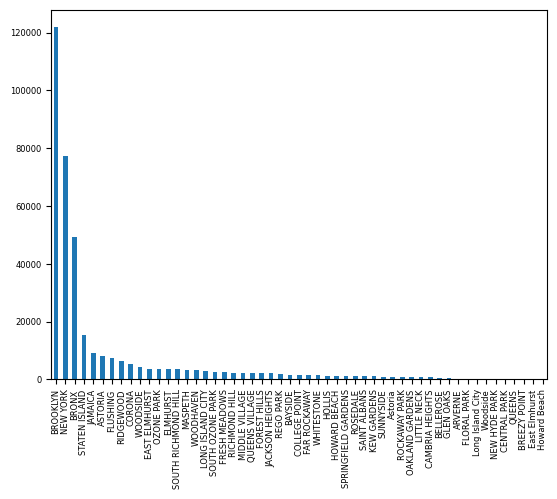

In [69]:
fig, ax = plt.subplots()
plt.rcParams.update({'font.size': 8})
categorical_nyc['City'].value_counts().plot(ax=ax, kind='bar')

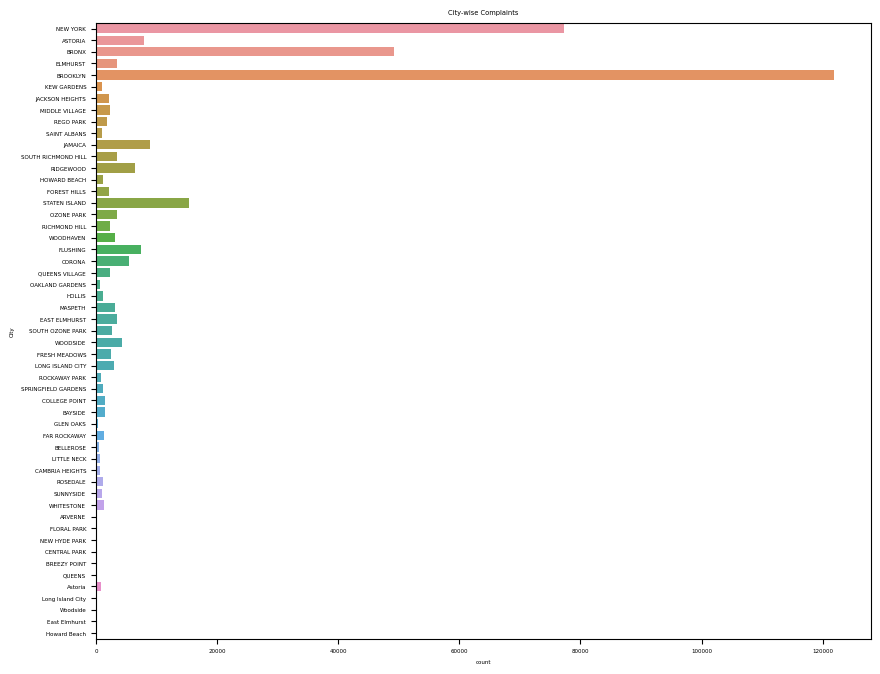

In [56]:
plt.figure(figsize=(10,8))
plt.title('City-wise Complaints')
sns.countplot(y='City', data=categorical_nyc)
plt.show()

In [87]:
df=pd.concat([categorical_nyc,numerical_nyc], axis=1)
df

,Created_Date,Closed_Date,Agency,Agency_Name,Complaint_Type,Descriptor,Location_Type,Incident_Address,Street_Name,Cross_Street_1,...,School_State,School_Zip,School_Not_Found,Location,Unique_Key,Incident_Zip,X_Coordinate_State_Plane,Y_Coordinate_State_Plane,Latitude,Longitude
0,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,...,Unspecified,Unspecified,N,"(40.86568153633767, -73.92350095571744)",32310363,10034.0,1005409.0,254678.0,40.865682,-73.923501
1,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,27-07 23 AVENUE,23 AVENUE,27 STREET,...,Unspecified,Unspecified,N,"(40.775945312321085, -73.91509393898605)",32309934,11105.0,1007766.0,221986.0,40.775945,-73.915094
2,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,...,Unspecified,Unspecified,N,"(40.870324522111424, -73.88852464418646)",32309159,10458.0,1015081.0,256380.0,40.870325,-73.888525
3,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,...,Unspecified,Unspecified,N,"(40.83599404683083, -73.82837939584206)",32305098,10461.0,1031740.0,243899.0,40.835994,-73.828379
4,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,87-14 57 ROAD,57 ROAD,SEABURY STREET,...,Unspecified,Unspecified,N,"(40.733059618956815, -73.87416975810375)",32306529,11373.0,1019123.0,206375.0,40.733060,-73.874170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364553,2015-01-01 00:04:44,2015-01-01 10:22:31,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,84-25 85 ROAD,85 ROAD,FOREST PARKWAY,...,Unspecified,Unspecified,N,"(40.69514470265117, -73.86094888534394)",29609918,11421.0,1022809.0,192567.0,40.695145,-73.860949
364554,2015-01-01 00:04:28,2015-01-01 02:25:02,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,2555 SEDGWICK AVENUE,SEDGWICK AVENUE,BAILEY AVENUE,...,Unspecified,Unspecified,N,"(40.86782963689454, -73.90717786644662)",29608392,10468.0,1009923.0,255465.0,40.867830,-73.907178
364555,2015-01-01 00:01:30,2015-01-01 00:20:33,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,508 WEST 139 STREET,WEST 139 STREET,AMSTERDAM AVENUE,...,Unspecified,Unspecified,N,"(40.821646626438095, -73.95087342885292)",29607589,10031.0,997847.0,238629.0,40.821647,-73.950873
364556,2015-01-01 00:01:29,2015-01-01 02:42:22,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,931 EAST 226 STREET,EAST 226 STREET,BRONXWOOD AVENUE,...,Unspecified,Unspecified,N,"(40.88636077906953, -73.85329048666742)",29610889,10466.0,1024816.0,262237.0,40.886361,-73.853290


<AxesSubplot:xlabel='City'>

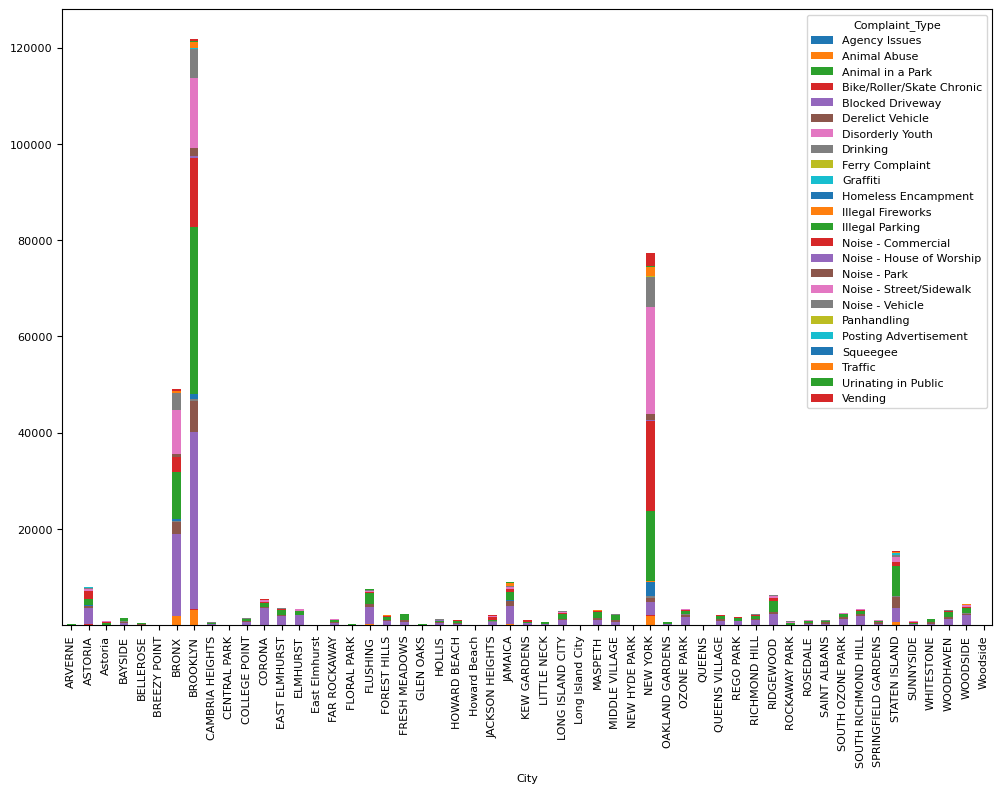

In [88]:
pd1 = pd.crosstab(index=df.City,columns = df.Complaint_Type)
pd1
pd1.plot(kind='bar',figsize=(12,8),stacked = True)

In [89]:
df_b=df[df['City']=='BROOKLYN']

In [90]:
df_b

,Created_Date,Closed_Date,Agency,Agency_Name,Complaint_Type,Descriptor,Location_Type,Incident_Address,Street_Name,Cross_Street_1,...,School_State,School_Zip,School_Not_Found,Location,Unique_Key,Incident_Zip,X_Coordinate_State_Plane,Y_Coordinate_State_Plane,Latitude,Longitude
5,2015-12-31 23:56:30,2016-01-01 01:50:11,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,260 21 STREET,21 STREET,5 AVENUE,...,Unspecified,Unspecified,N,"(40.66082272389114, -73.99256786342693)",32306554,11215.0,986312.0,180032.0,40.660823,-73.992568
9,2015-12-31 23:53:58,2016-01-01 01:17:40,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,1408 66 STREET,66 STREET,14 AVENUE,...,Unspecified,Unspecified,N,"(40.623793065806524, -73.99953890121567)",32308391,11219.0,984378.0,166541.0,40.623793,-73.999539
13,2015-12-31 23:47:58,2016-01-01 08:18:47,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,38 COX PLACE,COX PLACE,CRESCENT STREET,...,Unspecified,Unspecified,N,"(40.68751060232221, -73.87450451131276)",32305074,11208.0,1019054.0,189780.0,40.687511,-73.874505
17,2015-12-31 23:44:52,2016-01-01 00:36:10,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,622 DEGRAW STREET,DEGRAW STREET,3 AVENUE,...,Unspecified,Unspecified,N,"(40.679154133157326, -73.98342992763081)",32310273,11217.0,988846.0,186711.0,40.679154,-73.983430
18,2015-12-31 23:40:59,2016-01-01 02:37:28,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,2192 FLATBUSH AVENUE,FLATBUSH AVENUE,EAST 46 STREET,...,Unspecified,Unspecified,N,"(40.61655032892211, -73.93020153359745)",32306617,11234.0,1003628.0,163910.0,40.616550,-73.930202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364539,2015-01-01 00:23:55,2015-01-01 02:58:38,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,229 DUFFIELD STREET,DUFFIELD STREET,WILLOUGHBY STREET,...,Unspecified,Unspecified,N,"(40.69124772858873, -73.98437529459297)",29608505,11201.0,988583.0,191117.0,40.691248,-73.984375
364541,2015-01-01 00:19:22,2015-01-01 02:41:10,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,27 HOPE STREET,HOPE STREET,ROEBLING STREET,...,Unspecified,Unspecified,N,"(40.71361332917013, -73.95696623841229)",29612697,11211.0,996180.0,199268.0,40.713613,-73.956966
364544,2015-01-01 00:17:48,2015-01-01 03:24:48,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,242 FLATBUSH AVENUE,FLATBUSH AVENUE,BERGEN STREET,...,Unspecified,Unspecified,N,"(40.68035202521423, -73.97476587888686)",29613295,11217.0,991249.0,187148.0,40.680352,-73.974766
364545,2015-01-01 00:17:47,2015-01-01 00:51:13,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,1373 DECATUR STREET,DECATUR STREET,KNICKERBOCKER AVENUE,...,Unspecified,Unspecified,N,"(40.692383519190834, -73.90401080101479)",29613456,11237.0,1010869.0,191545.0,40.692384,-73.904011


In [91]:
df_b.columns

Index(['Created_Date', 'Closed_Date', 'Agency', 'Agency_Name',
       'Complaint_Type', 'Descriptor', 'Location_Type', 'Incident_Address',
       'Street_Name', 'Cross_Street_1', 'Cross_Street_2', 'Address_Type',
       'City', 'Facility_Type', 'Status', 'Due_Date', 'Resolution_Description',
       'Resolution_Action_Updated_Date', 'Community_Board', 'Borough',
       'Park_Facility_Name', 'Park_Borough', 'School_Name', 'School_Number',
       'School_Region', 'School_Code', 'School_Phone_Number', 'School_Address',
       'School_City', 'School_State', 'School_Zip', 'School_Not_Found',
       'Location', 'Unique_Key', 'Incident_Zip', 'X_Coordinate_State_Plane',
       'Y_Coordinate_State_Plane', 'Latitude', 'Longitude'],
      dtype='object')

In [92]:
df_b[['Latitude', 'Longitude']].countplot(kind ='scatter', x='Longitude', y='Latitude',
                                            title = 'Complaints Concentration in Brooklyn')

AttributeError: 'DataFrame' object has no attribute 'countplot'

<AxesSubplot:title={'center':'Count vs Complaint types'}>

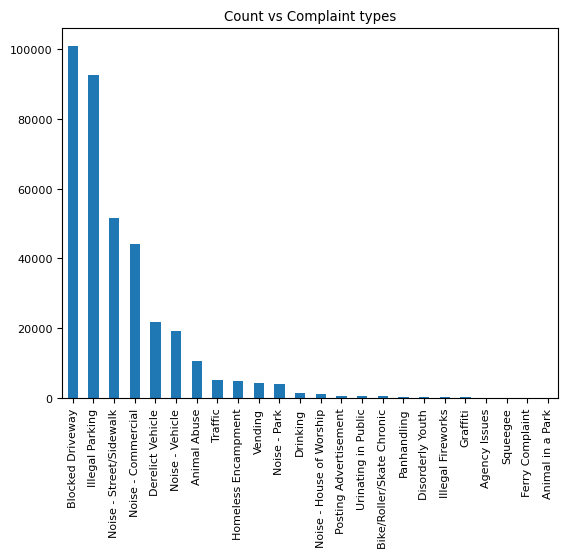

In [93]:
plt.rcParams.update({'font.size': 8})
df["Complaint_Type"].value_counts().plot(kind="bar",title="Count vs Complaint types")

In [94]:
df["Complaint_Type"].value_counts().nlargest(10)

Blocked Driveway           100881
Illegal Parking             92679
Noise - Street/Sidewalk     51692
Noise - Commercial          44109
Derelict Vehicle            21661
Noise - Vehicle             19352
Animal Abuse                10541
Traffic                      5198
Homeless Encampment          4879
Vending                      4192
Name: Complaint_Type, dtype: int64

In [95]:
df[["City","Complaint_Type"]].value_counts().nlargest(50)

City                 Complaint_Type         
BROOKLYN             Blocked Driveway           36780
                     Illegal Parking            34800
NEW YORK             Noise - Street/Sidewalk    22252
                     Noise - Commercial         18692
BRONX                Blocked Driveway           17063
BROOKLYN             Noise - Street/Sidewalk    14622
NEW YORK             Illegal Parking            14553
BROOKLYN             Noise - Commercial         14282
BRONX                Illegal Parking             9889
                     Noise - Street/Sidewalk     9146
BROOKLYN             Derelict Vehicle            6460
NEW YORK             Noise - Vehicle             6295
STATEN ISLAND        Illegal Parking             6224
BROOKLYN             Noise - Vehicle             6024
FLUSHING             Blocked Driveway            3641
JAMAICA              Blocked Driveway            3621
CORONA               Blocked Driveway            3597
BRONX                Noise - Vehicle 

In [106]:
from datetime import date
df["Response_Time"] = df['Closed_Date'] - df['Created_Date'].dt.days
df

AttributeError: 'DatetimeProperties' object has no attribute 'days'

In [108]:
df.groupby('Complaint_Type').Response_Time.mean()

Complaint_Type
Agency Issues                    0 days 05:04:49.125000
Animal Abuse                  0 days 05:37:12.473863959
Animal in a Park                       14 days 00:50:34
Bike/Roller/Skate Chronic   -1 days +18:17:44.010460252
Blocked Driveway              0 days 07:02:42.696246072
Derelict Vehicle              0 days 13:01:51.629841650
Disorderly Youth              0 days 03:26:03.749206349
Drinking                    -1 days +23:28:51.849538680
Ferry Complaint                 51 days 22:22:17.500000
Graffiti                      0 days 06:27:56.343949044
Homeless Encampment           0 days 04:17:31.384505021
Illegal Fireworks             0 days 02:48:33.482558139
Illegal Parking               0 days 16:21:16.466178961
Noise - Commercial            0 days 14:31:57.013489310
Noise - House of Worship      0 days 06:37:35.073831775
Noise - Park                  0 days 08:47:14.042346069
Noise - Street/Sidewalk       0 days 15:48:06.047163971
Noise - Vehicle               0 d